### CG_05 aragonite undersaturation
 
need: 
- 

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
# from mpl_toolkits.basemap import Basemap
from scipy.io import loadmat
import cmocean 
import warnings
import arrow
from salishsea_tools import viz_tools, places
import netCDF4 as nc
import pickle
from salishsea_tools import visualisations as vis
#import LambertConformalTicks as lct

%matplotlib inline
plt.rcParams['font.size'] = 11
warnings.simplefilter('ignore')

## undersaturated percents are calculated in:
    KEY_OMA OmA_percent_domain_cells_undersaturated_calculator

# code for extracting OmA averages -winter/summer

In [5]:
BR3_summer_3mon = pickle.load(open('../pkls/aragonite/BR3_Oma_SUMMERmean_01jun_31aug.pkl', 'rb'))  
BR3_winter_3mon = pickle.load(open('../pkls/aragonite/BR3_Oma_WINTERmean_01dec_28feb.pkl', 'rb'))  
PI9_summer_3mon = pickle.load(open('../pkls/PI9_Oma_SUMMERmean_01jun_31aug.pkl', 'rb'))  
PI9_winter_3mon = pickle.load(open('../pkls/PI9_Oma_WINTERmean_01dec_28feb.pkl', 'rb'))  



In [6]:
days = np.arange(1,366,1)
tcm = cmocean.cm.phase
lw = 2.5

days = np.arange(1,366,1)
tcm = cmocean.cm.phase
lw = 2.5


PI_under_0pt5_vol = pickle.load(open('./pkls/PI9_under_0pt5_vol.pkl', 'rb'))   
PI_under_0pt6_vol = pickle.load(open('./pkls/PI9_under_0pt6_vol.pkl', 'rb'))   
PI_under_0pt7_vol = pickle.load(open('./pkls/PI9_under_0pt7_vol.pkl', 'rb'))   
PI_under_0pt8_vol = pickle.load(open('./pkls/PI9_under_0pt8_vol.pkl', 'rb'))   
PI_under_0pt9_vol = pickle.load(open('./pkls/PI9_under_0pt9_vol.pkl', 'rb'))   
PI_under_1pt0_vol = pickle.load(open('./pkls/PI9_under_1pt0_vol.pkl', 'rb'))   
PI_under_1pt1_vol = pickle.load(open('./pkls/PI9_under_1pt1_vol.pkl', 'rb'))   
PI_under_1pt2_vol = pickle.load(open('./pkls/PI9_under_1pt2_vol.pkl', 'rb'))   
PI_under_1pt3_vol = pickle.load(open('./pkls/PI9_under_1pt3_vol.pkl', 'rb'))   
PI_under_1pt4_vol = pickle.load(open('./pkls/PI9_under_1pt4_vol.pkl', 'rb'))   
PI_under_1pt5_vol = pickle.load(open('./pkls/PI9_under_1pt5_vol.pkl', 'rb'))   

BR_under_0pt5_vol = pickle.load(open('./pkls/BR3_under_0pt5_vol.pkl', 'rb'))   
BR_under_0pt6_vol = pickle.load(open('./pkls/BR3_under_0pt6_vol.pkl', 'rb'))   
BR_under_0pt7_vol = pickle.load(open('./pkls/BR3_under_0pt7_vol.pkl', 'rb'))   
BR_under_0pt8_vol = pickle.load(open('./pkls/BR3_under_0pt8_vol.pkl', 'rb'))   
BR_under_0pt9_vol = pickle.load(open('./pkls/BR3_under_0pt9_vol.pkl', 'rb'))   
BR_under_1pt0_vol = pickle.load(open('./pkls/BR3_under_1pt0_vol.pkl', 'rb'))   
BR_under_1pt1_vol = pickle.load(open('./pkls/BR3_under_1pt1_vol.pkl', 'rb'))   
BR_under_1pt2_vol = pickle.load(open('./pkls/BR3_under_1pt2_vol.pkl', 'rb'))   
BR_under_1pt3_vol = pickle.load(open('./pkls/BR3_under_1pt3_vol.pkl', 'rb'))   
BR_under_1pt4_vol = pickle.load(open('./pkls/BR3_under_1pt4_vol.pkl', 'rb'))   
BR_under_1pt5_vol = pickle.load(open('./pkls/BR3_under_1pt5_vol.pkl', 'rb'))   

## 'Nicest' plot so far - 3 month averages

#### histogram of summer and winter means

In [7]:
csize = pickle.load(open('../pkls/cellsize_alg2.pkl', 'rb'))
csize[BR3_summer_3mon > 1e10 ] = 0


BR3_summer_nn = BR3_summer_3mon[BR3_summer_3mon<1e10]
BR3_winter_nn = BR3_winter_3mon[BR3_winter_3mon<1e10]
PI9_summer_nn = PI9_summer_3mon[PI9_summer_3mon<1e10]
PI9_winter_nn = PI9_winter_3mon[PI9_winter_3mon<1e10]



csize_nn = csize[BR3_summer_3mon<1e10]
csize_nn[np.isnan(csize_nn)] = 0


nbins = 40
hist_BR3_summer, bins = np.histogram(BR3_summer_nn, bins=nbins, range = [0, 4], weights=csize_nn)
hist_PI9_summer, bins = np.histogram(PI9_summer_nn, bins=nbins, range = [0, 4], weights=csize_nn)
hist_BR3_winter, bins = np.histogram(BR3_winter_nn, bins=nbins, range = [0, 4], weights=csize_nn)
hist_PI9_winter, bins = np.histogram(PI9_winter_nn, bins=nbins, range = [0, 4], weights=csize_nn)


bin_cent = bins + (bins[1]-bins[0])/2
tot_count = np.sum(hist_BR3_summer)

#### calculate summer winter  differences in asat

In [8]:
BR3_summer_fm = np.copy(BR3_summer_3mon)
BR3_summer_fm[BR3_summer_fm>1e10] = np.nan
BR3_summer_fm[BR3_summer_fm== 0 ] = np.nan
BR3_winter_fm = np.copy(BR3_winter_3mon)
BR3_winter_fm[BR3_winter_fm>1e10] = np.nan
BR3_winter_fm[BR3_winter_fm== 0 ] = np.nan

PI9_summer_fm = np.copy(PI9_summer_3mon)
PI9_summer_fm[PI9_summer_fm>1e10] = np.nan
PI9_summer_fm[PI9_summer_fm== 0 ] = np.nan

PI9_winter_fm = np.copy(PI9_winter_3mon)
PI9_winter_fm[PI9_winter_fm>1e10] = np.nan
PI9_winter_fm[PI9_winter_fm== 0 ] = np.nan

summer_diff = BR3_summer_fm-PI9_summer_fm
winter_diff = BR3_winter_fm-PI9_winter_fm
print(np.nanmin(summer_diff))
print(np.shape(BR3_summer_fm))

summer_mean_diff_dp = np.zeros(40)
winter_mean_diff_dp = np.zeros(40)
summer_std_diff_dp = np.zeros(40)
winter_std_diff_dp = np.zeros(40)

for i in range(0,40):
    summer_mean_diff_dp[i] = np.nanmean(summer_diff[i,:,:])
    summer_std_diff_dp[i] = np.nanstd(summer_diff[i,:,:])
    winter_mean_diff_dp[i] = np.nanmean(winter_diff[i,:,:])
    winter_std_diff_dp[i] = np.nanstd(winter_diff[i,:,:])

print('winter mean diff')
print(winter_mean_diff_dp)
print(np.nanmean(winter_mean_diff_dp))
print('summer mean diff')
print(summer_mean_diff_dp)
print(np.nanmean(summer_mean_diff_dp))


-0.6381389809691389
(40, 898, 398)
winter mean diff
[-0.2795815  -0.28394837 -0.28815171 -0.29095119 -0.29416557 -0.29580994
 -0.29715785 -0.29807379 -0.29870038 -0.29907288 -0.29924853 -0.29932554
 -0.29936145 -0.29943132 -0.29925573 -0.2990737  -0.29877139 -0.29843201
 -0.29794625 -0.29733842 -0.29640492 -0.29496049 -0.29273632 -0.28968482
 -0.28665043 -0.28274517 -0.27696611 -0.2708573  -0.26732075 -0.26557963
 -0.26576553 -0.26703907 -0.2672999  -0.26603171 -0.26387796 -0.26154615
 -0.26067074 -0.2600183  -0.26301691         nan]
-0.28494794200329093
summer mean diff
[-0.36179345 -0.36608289 -0.37155887 -0.37551611 -0.37819751 -0.37797514
 -0.37631    -0.37349927 -0.37009571 -0.36611224 -0.36200288 -0.35793539
 -0.35385424 -0.34987097 -0.34570909 -0.34154862 -0.33730683 -0.33275297
 -0.32763195 -0.32137204 -0.31314493 -0.30218623 -0.28859425 -0.27414784
 -0.25940846 -0.24789687 -0.24257559 -0.24102273 -0.24113992 -0.24332304
 -0.24940756 -0.25499138 -0.2605263  -0.26356452 -0.26430

In [9]:
#np.average(summer_diff[:,:,:],weights = csize)

masked_summer_diff = np.ma.masked_array(summer_diff, np.isnan(summer_diff))
# calculate your weighted average here instead
#weights = [1, 1, 1]

csize[np.isnan(csize)] = 0
average = np.ma.average(masked_summer_diff, weights=csize)
print(average)
masked_winter_diff = np.ma.masked_array(winter_diff, np.isnan(winter_diff))
# calculate your weighted average here instead
#weights = [1, 1, 1]

csize[np.isnan(csize)] = 0
average = np.ma.average(masked_winter_diff, weights=csize)
print(average)

-0.27379718505911227
-0.27834382767022764


In [10]:
depths = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
tdepths = np.squeeze(depths['gdept_1d'][:])


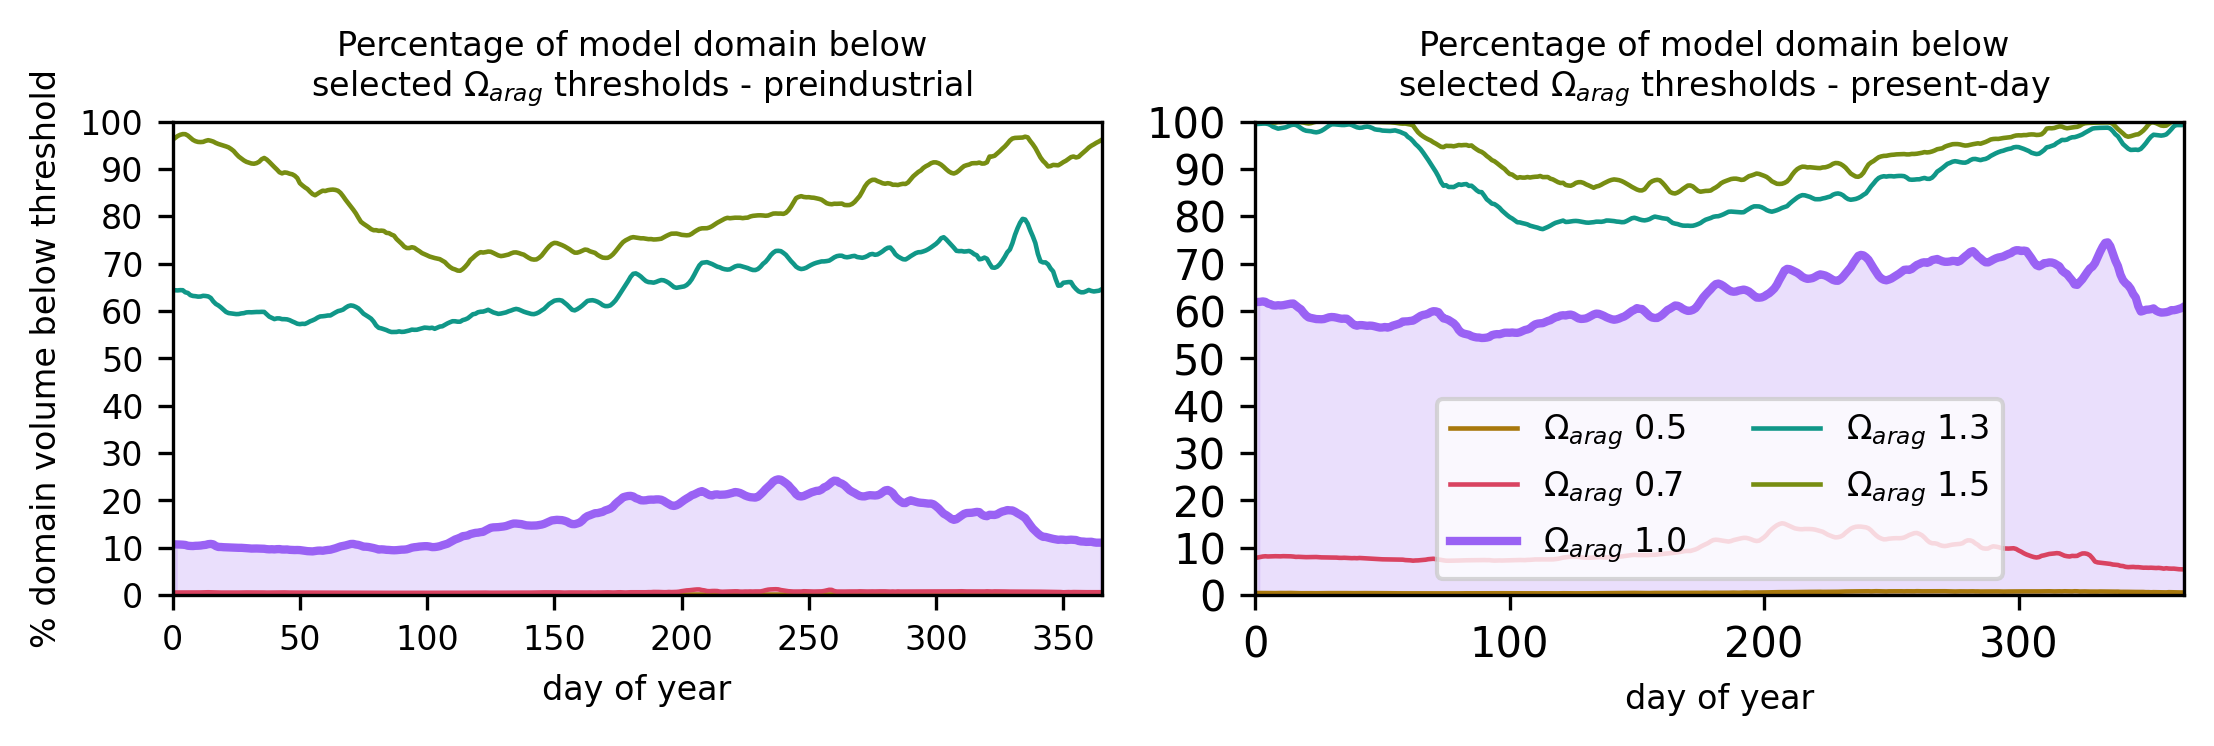

In [11]:
fact = 1
fs = 8

lw = 1.1
# fig = plt.figure(figsize=(12*fact, 3.5*fact))
fig = plt.figure(figsize=(19*(1)/2.54, (23/3.5)/2.54), dpi = 300)

#fig = plt.figure(figsize=(17*fact1/2.54,23*fact*(2/3)/2.54),dpi = 300)

ax5 = plt.subplot2grid((1,2), (0,0), colspan=1, rowspan=1)

ax5.plot(days,PI_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 0.5 \n (PI)')
ax5.plot(days,PI_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = '-')
ax5.plot(days,PI_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = 2, linestyle = '-')
ax5.plot(days,PI_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = '-')

ax5.plot(days,PI_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = '-')
ax5.fill_between(days, np.zeros_like(days), PI_under_1pt0_vol*100, \
                 color = tcm(1.*5/11), alpha = 0.2 )

ax5.tick_params(axis='both', which='major', labelsize=fs)

w = ax5.set_xticks(np.arange(0, 365, step=50))
ax5.set_xlim(0,365)
ax5.set_ylim(0,100)
w = ax5.set_yticks(np.arange(0, 110, step=10))
ax5.set_ylabel('% domain volume below threshold', fontsize = fs)
ax5.set_xlabel('day of year', fontsize = fs)
ax5.set_title('Percentage of model domain below \n selected $\Omega_{arag}$ thresholds - preindustrial', fontsize = 8)

# ax6 = plt.subplot2grid((1,5), (0,3), colspan=2, rowspan=1)
ax5 = plt.subplot2grid((1,2), (0,1), colspan=1, rowspan=1)
ax5.plot(days,BR_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 0.5')
ax5.plot(days,BR_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 0.7')
ax5.plot(days,BR_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = 2, linestyle = '-', label = '$\Omega_{arag}$ 1.0')
ax5.plot(days,BR_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 1.3')

ax5.plot(days,BR_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 1.5')
ax5.fill_between(days, np.zeros_like(days), BR_under_1pt0_vol*100, \
                 color = tcm(1.*5/11), alpha = 0.2 )
#ax5.set_ylabel('% domain volume below threshold', fontsize = fs)

ax5.set_xlim(0,365)
ax5.set_ylim(0,100)
ax5.legend(loc = 'lower center', ncol = 2, fontsize = 8 )
w = ax5.set_yticks(np.arange(0, 110, step=10))
#ax5.set_ylabel('% domain volume below threshold', fontsize = fs)
ax5.set_xlabel('day of year', fontsize = fs)
ax5.set_title('Percentage of model domain below \n selected $\Omega_{arag}$ thresholds - present-day', fontsize = 8)

plt.tight_layout()

#plt.savefig('Fig4e.jpg')

In [12]:
print(np.mean(BR_under_1pt0_vol))
print(np.mean(PI_under_1pt0_vol))

bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

0.6317683550337705
0.15624421955014622


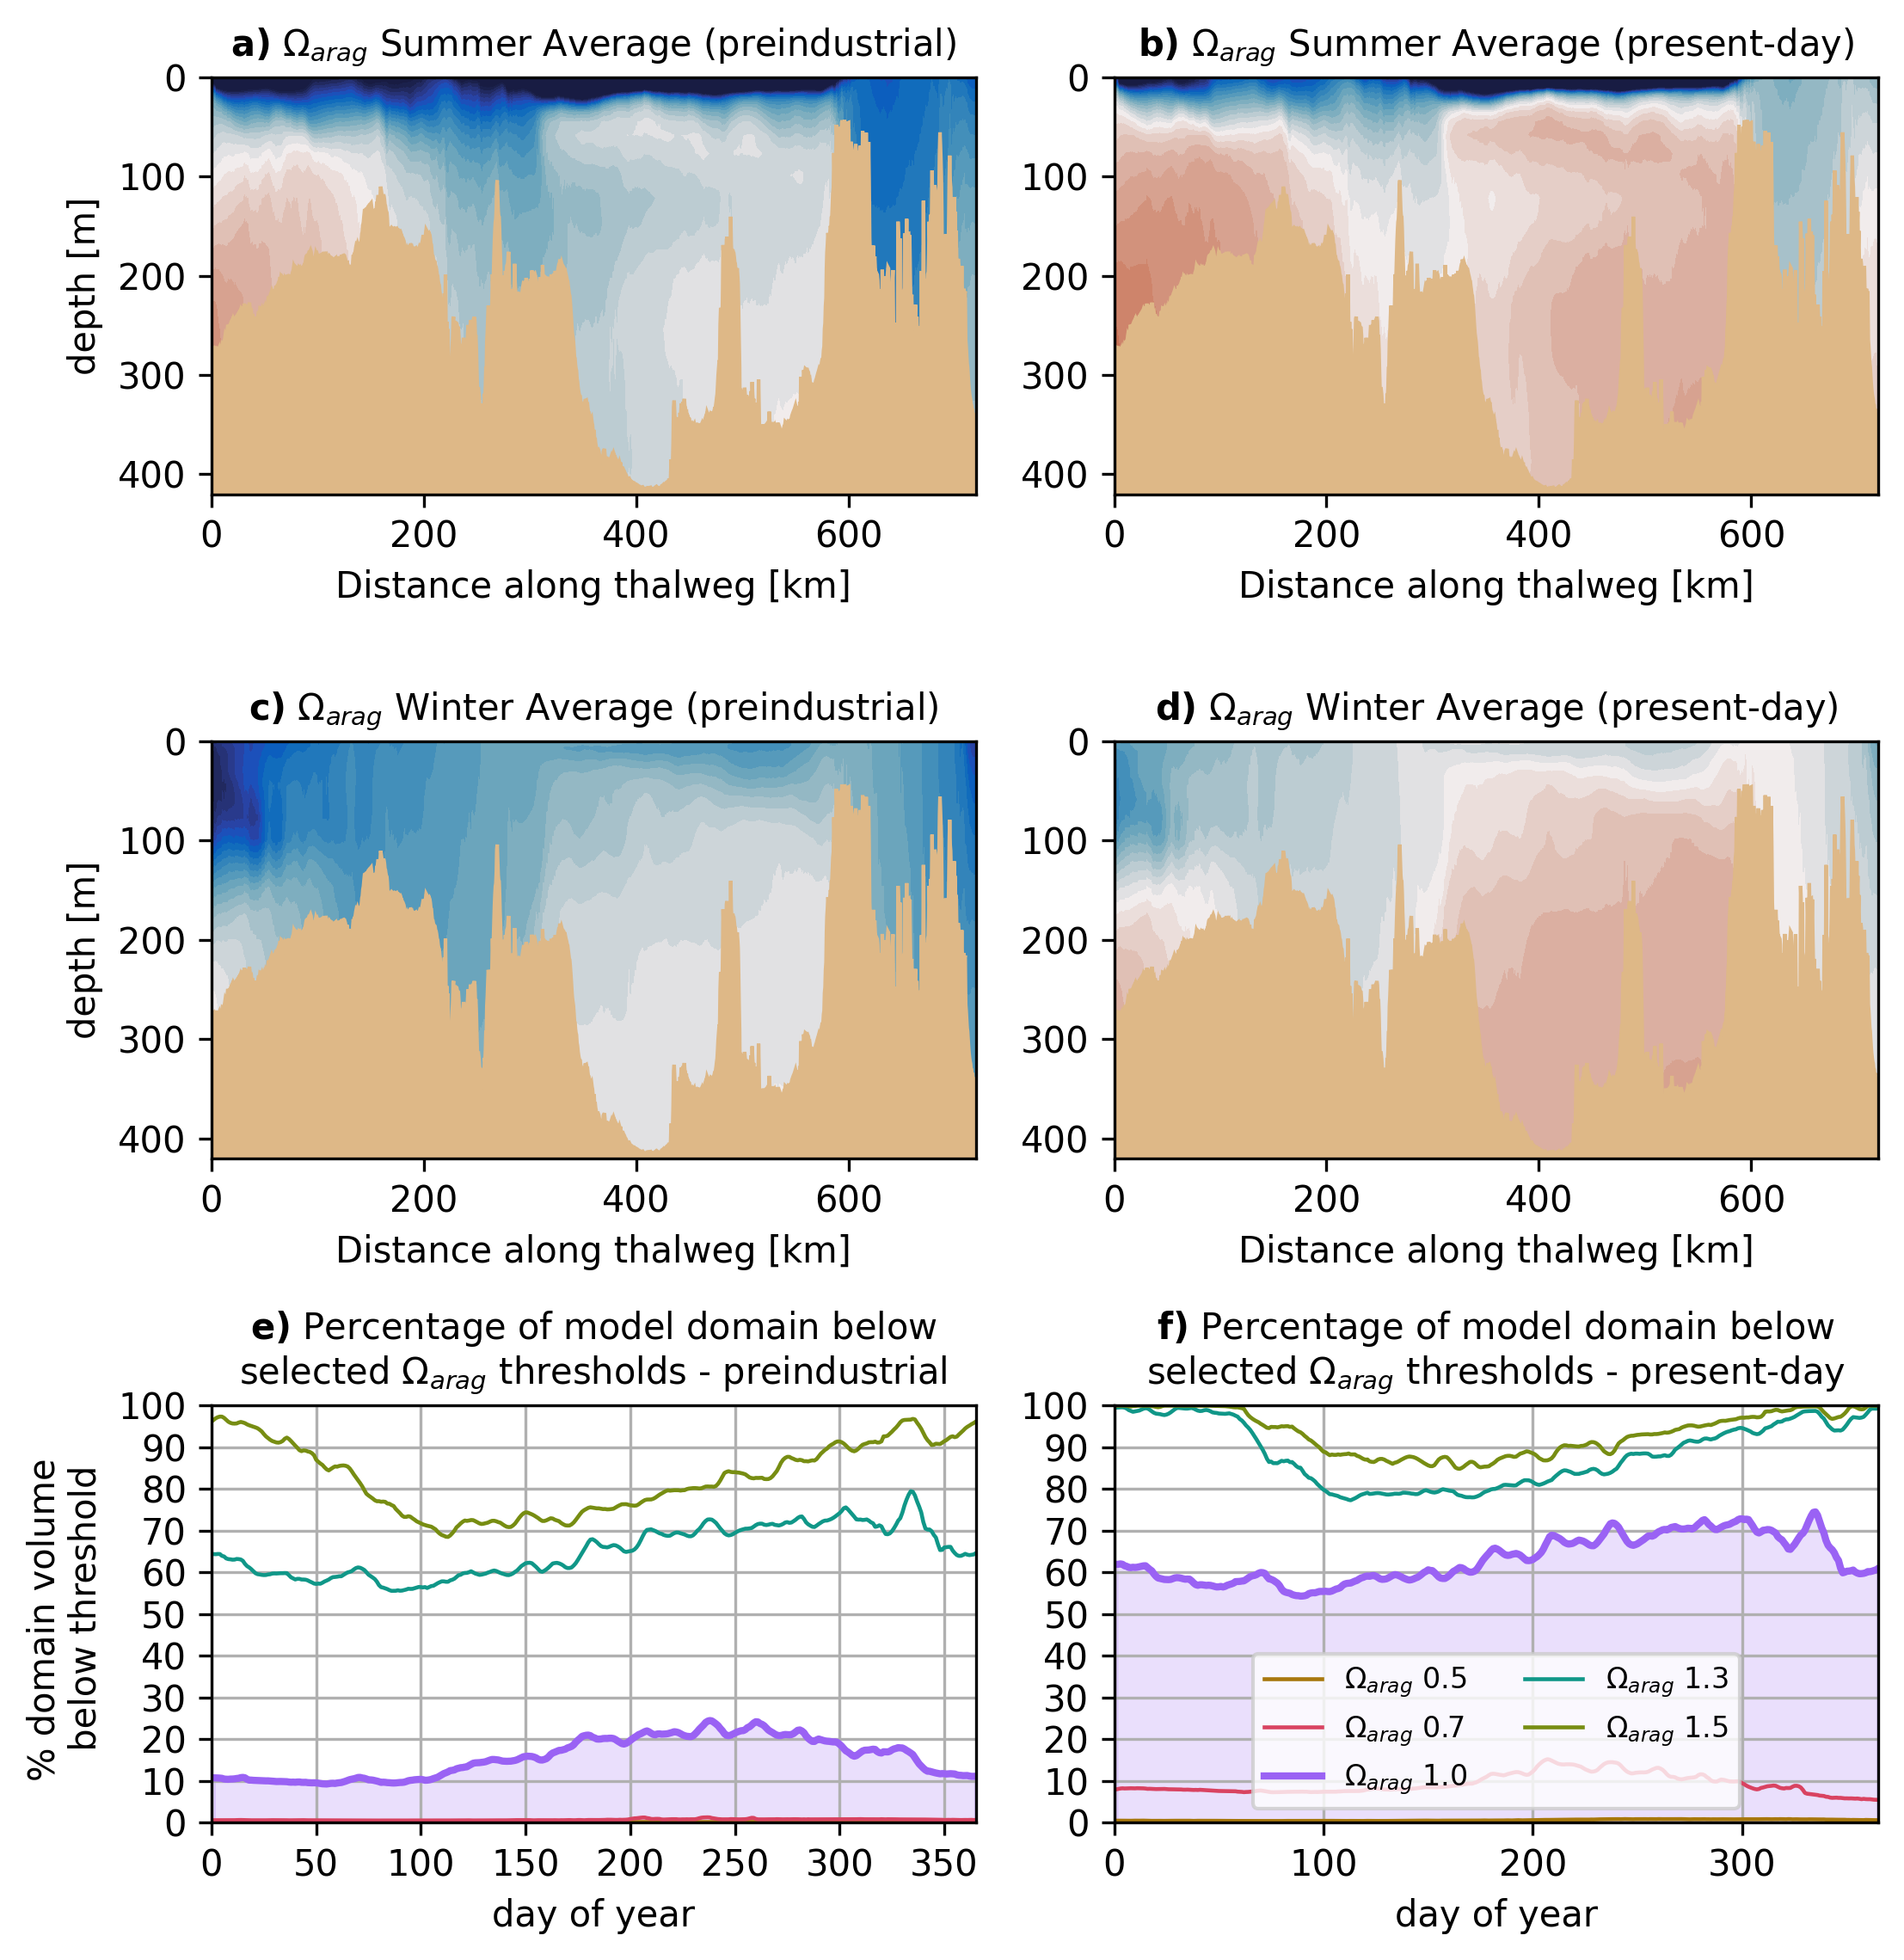

In [13]:
ts = 10
fs = 10

fig, axs = plt.subplots(3,2, figsize=(19/2.54,23*0.85/2.54), 
                        dpi = 300, facecolor='w', edgecolor='k')

axs = axs.ravel()

ax1 = axs[0]
PI9_summer_3mon[PI9_summer_3mon > 1e10] = 1.1
cbar = \
vis.contour_thalweg(ax1, PI9_summer_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax1.set_ylim([0,420])
ax1.invert_yaxis()
ax1.set_title(r'$\bf{a)}$ $\Omega_{arag}$ Summer Average (preindustrial)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_{arag}$', fontsize = fs)
ax1.tick_params(axis='both', which='major', labelsize=fs)
ax1.set_xlabel('Distance along thalweg [km]', fontsize = fs)
ax1.set_ylabel('depth [m]', fontsize = fs)
cbar.remove()

ax2 = axs[2]
PI9_winter_3mon[PI9_winter_3mon > 1e10] = 1.1
cbar = \
vis.contour_thalweg(ax2, PI9_winter_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax2.set_title(r'$\bf{c)}$ $\Omega_{arag}$ Winter Average (preindustrial)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_{arag}$', fontsize = fs)
ax2.tick_params(axis='both', which='major', labelsize=fs)
ax2.set_xlabel('Distance along thalweg [km]', fontsize = fs)
cbar.remove()
ax2.set_ylim([0,420])
ax2.invert_yaxis()
ax2.set_ylabel('depth [m]', fontsize = fs)

ax3 = axs[1]
BR3_summer_3mon[BR3_summer_3mon > 1e10] = 1.1
cbar = \
vis.contour_thalweg(ax3, BR3_summer_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax3.set_title(r'$\bf{b)}$ $\Omega_{arag}$ Summer Average (present-day)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_{arag}$', fontsize = fs)
ax3.tick_params(axis='both', which='major', labelsize=fs)
ax3.set_xlabel('Distance along thalweg [km]', fontsize = fs)
cbar.remove()
ax3.set_ylim([0,420])
ax3.invert_yaxis()
ax3.set_ylabel('', fontsize = fs)

ax4 = axs[3]
BR3_winter_3mon[BR3_winter_3mon > 1e10] = 1.1
cbar = \
vis.contour_thalweg(ax4, BR3_winter_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax4.set_title(r'$\bf{d)}$ $\Omega_{arag}$ Winter Average (present-day)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_{arag}$', fontsize = fs)
ax4.tick_params(axis='both', which='major', labelsize=fs)
ax4.set_xlabel('Distance along thalweg [km]', fontsize = fs)
ax4.set_ylabel('', fontsize = fs)
cbar.remove()
ax4.set_ylim([0,420])
ax4.invert_yaxis()


ax5 = axs[4]

ax5.plot(days,PI_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 0.5 \n (PI)')
ax5.plot(days,PI_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = '-')
ax5.plot(days,PI_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = 2, linestyle = '-')
ax5.plot(days,PI_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = '-')

ax5.plot(days,PI_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = '-')
ax5.fill_between(days, np.zeros_like(days), PI_under_1pt0_vol*100, \
                 color = tcm(1.*5/11), alpha = 0.2 )

ax5.tick_params(axis='both', which='major', labelsize=fs)

w = ax5.set_xticks(np.arange(0, 365, step=50))
ax5.set_xlim(0,365)
ax5.set_ylim(0,100)
w = ax5.set_yticks(np.arange(0, 110, step=10))
ax5.set_ylabel('% domain volume \n below threshold', fontsize = fs)
ax5.set_xlabel('day of year', fontsize = fs)
#ax5.set_title(r'$\bf{e)}$ Percentage of model domain below \r selected $\Omega_{arag}$ thresholds - preindustrial', fontsize = fs)
ax5.set_title(r"$\bf{e)}$ Percentage of model domain below"
           "\n"  # Newline: the backslash is interpreted as usual
           r"selected $\Omega_{arag}$ thresholds - preindustrial", fontsize = fs)
ax5.grid()

ax5 = axs[5]
ax5.plot(days,BR_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 0.5')
ax5.plot(days,BR_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 0.7')
ax5.plot(days,BR_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = 2, linestyle = '-', label = '$\Omega_{arag}$ 1.0')
ax5.plot(days,BR_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 1.3')

ax5.plot(days,BR_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 1.5')
ax5.fill_between(days, np.zeros_like(days), BR_under_1pt0_vol*100, \
                 color = tcm(1.*5/11), alpha = 0.2 )
#ax5.set_ylabel('% domain volume below threshold', fontsize = fs)

ax5.set_xlim(0,365)
ax5.set_ylim(0,100)
ax5.legend(loc = 'lower center', ncol = 2, fontsize = 8 )
w = ax5.set_yticks(np.arange(0, 110, step=10))
#ax5.set_ylabel('% domain volume below threshold', fontsize = fs)
ax5.set_xlabel('day of year', fontsize = fs)
ax5.set_title(r"$\bf{f)}$ Percentage of model domain below"
           "\n"  # Newline: the backslash is interpreted as usual
           r"selected $\Omega_{arag}$ thresholds - present-day", fontsize = fs)
ax5.grid()

plt.tight_layout()

fig.savefig('./CG_FIGS/FIG_CG_05_aragonite_undersaturation.jpg')




## adding bloody lines to the bloody thalweg plot

https://github.com/SalishSeaCast/mixing-paper/blob/master/analysis/Base%20Case-colour.ipynb

In [14]:
grid_B = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
mesh_mask = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
# bathy, lons, lats = tidetools.get_bathy_data(grid_B)
print(mesh_mask)
lons = grid_B['nav_lon'][:]
lats = grid_B['nav_lat'][:]
bathy2 = grid_B['Bathymetry'][:]
print(grid_B)
tmask = mesh_mask.variables['tmask'][:]

gdept = mesh_mask.variables['gdept_0'][0,:,:,:]
gdepw = mesh_mask.variables['gdepw_0'][0,:,:,:]

e3t = mesh_mask.variables['e3t_0'][0,:,:,:]
e3w = mesh_mask.variables['e3w_0'][0,:,:,:]


def haversine(lon1, lat1, lon2, lat2):
    """Calculate the great-circle distance in kilometers between two points
    on a sphere from their longitudes and latitudes.
    Reference: http://www.movable-type.co.uk/scripts/latlong.html
    :arg lon1: Longitude of point 1.
    :type lon1: float or :py:class:`numpy.ndarray`
    :arg lat1: Latitude of point 1.
    :type lat1: float or :py:class:`numpy.ndarray`
    :arg lon2: Longitude of point 2.
    :type lon2: float or :py:class:`numpy.ndarray`
    :arg lat2: Latitude of point 2.
    :type lat2: float or :py:class:`numpy.ndarray`
    :returns: Great-circle distance between two points in km
    :rtype: float or :py:class:`numpy.ndarray`
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

def distance_along_curve(lons, lats):
    """Calculate cumulative distance between points in lons, lats
    :arg lons: longitude points
    :type lons: numpy array
    :arg lats: latitude points
    :type lats: numpy array
    :returns: dist, a numpy array with distance along track
    """
    dist = [0]
    for i in np.arange(1, lons.shape[0]):
        newdist = dist[i-1] + haversine(lons[i], lats[i],
                                                  lons[i-1], lats[i-1])
        dist.append(newdist)
    dist = np.array(dist)
    return dist


# def load_thalweg(
#     gdept, lons, lats,
#     filename='/data/nsoontie/MEOPAR/tools/bathymetry/thalweg_working.txt'
# ):
#     """Thalweg grid indices, depths and disatance.
#     :arg gdept: full model depth array (shape 40x898x398)
#     :type gdept: numpy array
#     :arg lons: model longitude array (shape 898x398)
#     :type lons: numpy array
#     :arg lats: model latitude array (shape 898x398)
#     :type lats: numpy array
#     :returns: tpoints, gdept_thal, xx_thal
#     An array of thalweg grid indices, depths and distance.
#     """
#     tpoints = np.loadtxt(filename, delimiter=' ', dtype=int)
#     gdept_thal = gdept[:, tpoints[:, 0], tpoints[:, 1]]
#     lons_thal = lons[tpoints[:, 0], tpoints[:, 1]]
#     lats_thal = lats[tpoints[:, 0], tpoints[:, 1]]
#     xx_thal = distance_along_curve(lons_thal, lats_thal)
#     xx_thal = xx_thal + np.zeros(gdept_thal.shape)
#     return tpoints, gdept_thal, xx_thal


# thalweg_points, gdept_thal, xx = load_thalweg(gdept, lons, lats)



<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    file_name: NEMO-forcing/grid/mesh_mask201702.nc
    TimeStamp: 13/04/2017 22:37:31 -0700
    Conventions: CF-1.6
    title: Salish Sea NEMO bathymetry_201702 Bathymetry Mesh Mask
    institution: Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
    source: NEMO-3.6 Salish Sea configuration
    references: https://salishsea.eos.ubc.ca/erddap/info/
https://bitbucket.org/salishsea/nemo-forcing/src/tip/grid/bathymetery_201702.nc

    history: [2017-04-13 22:37] ncks -4 -L4 -O mesh_mask.nc mesh_mask201702.nc
[2017-05-15 12:41] Added metadata to variable in preparation for creation of ERDDAP datasets.
    dimensions(sizes): y(898), x(398), t(1), z(40)
    variables(dimensions): float32 nav_lon(y,x), float32 nav_lat(y,x), float64 time_counter(t), int8 tmask(t,z,y,x), int8 umask(t,z,y,x), int8 vmask(t,z,y,x), int8 fmask(t,z,y,x), int8 tmaskutil(t,y,x), int8 umaskutil(t,y,x), int

In [15]:
print(np.shape(PI9_summer_3mon))

varP=PI9_summer_3mon[:,thalweg_points[:,0],thalweg_points[:,1]]

print(varP.T)

(40, 898, 398)
[[1.41973012 1.41595965 1.41801939 ... 1.1        1.1        1.1       ]
 [1.41709329 1.41389313 1.41498678 ... 1.1        1.1        1.1       ]
 [1.51325724 1.51152788 1.51298283 ... 1.1        1.1        1.1       ]
 ...
 [1.1        1.1        1.1        ... 1.1        1.1        1.1       ]
 [1.1        1.1        1.1        ... 1.1        1.1        1.1       ]
 [1.1        1.1        1.1        ... 1.1        1.1        1.1       ]]


In [16]:
print(np.shape(gdept_thal))
print(np.shape(xx))
print(np.shape(np.transpose(varP.T)))


varP=PI9_summer_3mon[:,thalweg_points[:,0],thalweg_points[:,1]]
test = np.transpose(varP.T)

for i in range(0,1540):
    w = np.where(test[:,i] == 1.1)
    start_of_problem = (w[0][0])
    test[start_of_problem:40,i] = test[start_of_problem-1,i]

(40, 1540)
(40, 1540)
(40, 1540)


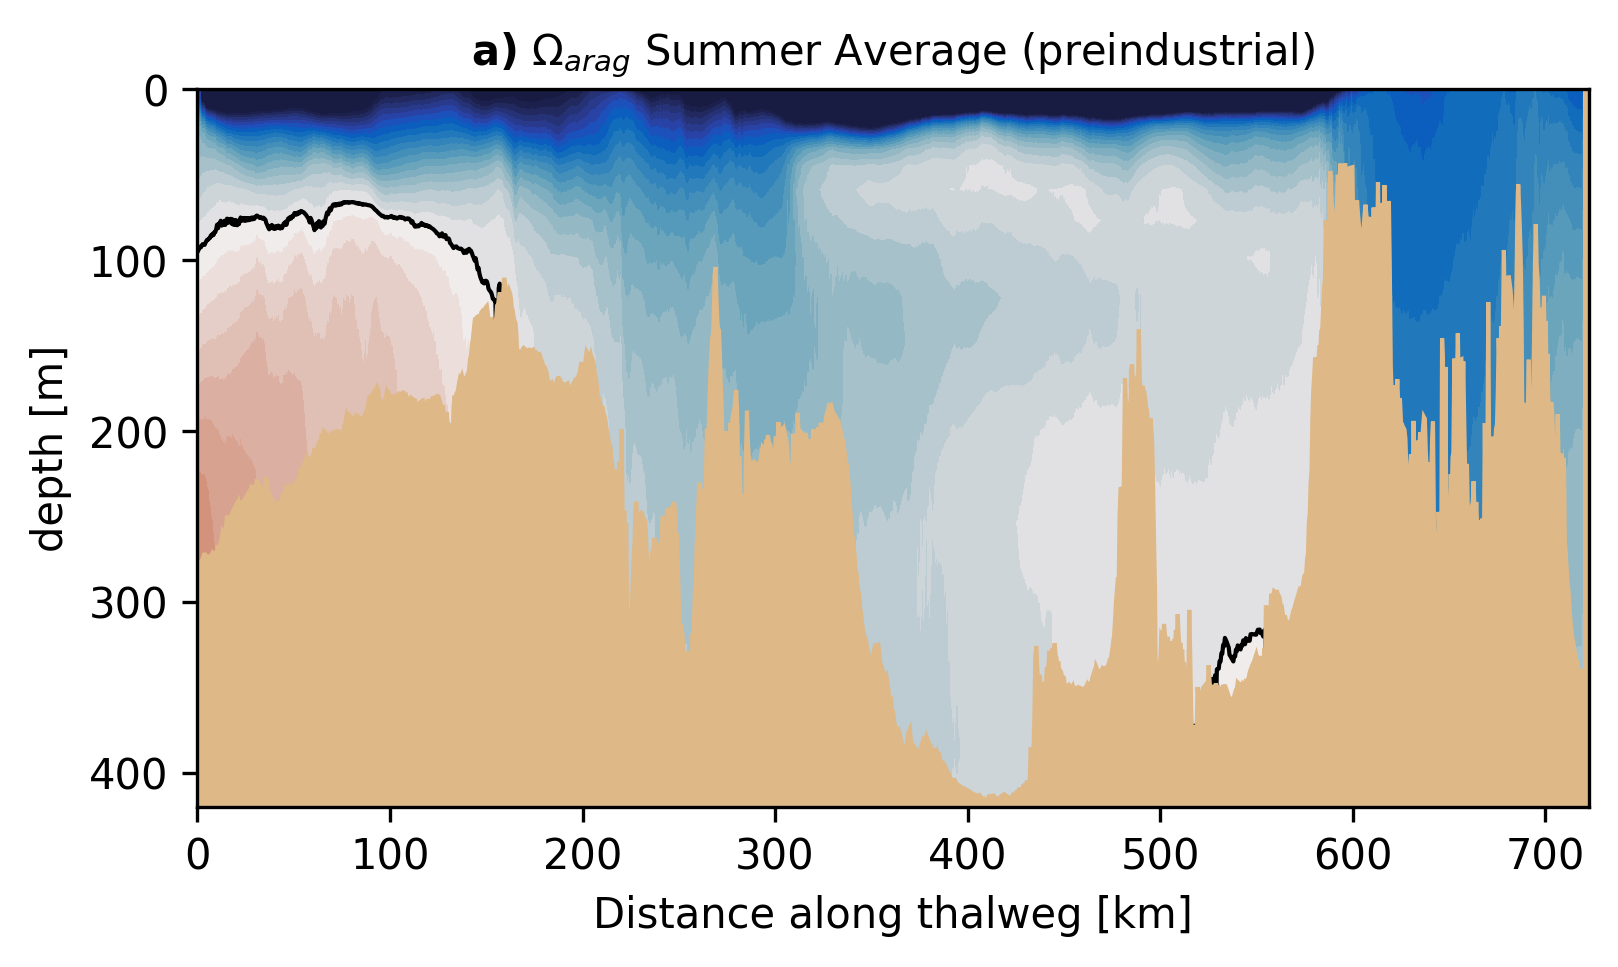

In [17]:
from matplotlib import patches

fig, axs = plt.subplots(1,1, figsize=(19/2.54,23*0.35/2.54), 
                        dpi = 300, facecolor='w', edgecolor='k')


ax1 = axs
PI9_summer_3mon[PI9_summer_3mon > 1e10] = 1.1
cbar = \
vis.contour_thalweg(ax1, PI9_summer_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)



varP=PI9_summer_3mon[:,thalweg_points[:,0],thalweg_points[:,1]]
test = np.transpose(varP.T)

for i in range(0,1540):
    w = np.where(test[:,i] == 1.1)
    start_of_problem = (w[0][0])
    test[start_of_problem:40,i] = test[start_of_problem-1,i]
    
CS=ax1.contour(xx, gdept_thal,test,[1], colors='k', linewidths = 1, linestyle = ':', zorder = 1)
cbar.add_lines(CS)
        
thalweg_bottom = bathy2[thalweg_points[:, 0], thalweg_points[:, 1]]
# Construct bathy polygon again
zmin = 450
poly = np.zeros((thalweg_bottom.shape[0]+2, 2))
poly[0, :] = 0, zmin
poly[1:-1, 0] = xx[0, :]
poly[1:-1:, 1] = thalweg_bottom
poly[-1, :] = xx[0, -1], zmin
ax1.add_patch(patches.Polygon(poly, facecolor='burlywood', edgecolor='burlywood', zorder = 0))
    
# ax1.contourf([bathy, mesh], PI9_summer_3mon, [1])
ax1.set_ylim([0,420])
ax1.invert_yaxis()
ax1.set_title(r'$\bf{a)}$ $\Omega_{arag}$ Summer Average (preindustrial)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_{arag}$', fontsize = fs)
ax1.tick_params(axis='both', which='major', labelsize=fs)
ax1.set_xlabel('Distance along thalweg [km]', fontsize = fs)
ax1.set_ylabel('depth [m]', fontsize = fs)
cbar.remove()

In [30]:
def load_thalweg(depths, var, lons, lats, thalweg_pts):
    """Returns depths, cumulative distance and variable along thalweg.
    :arg depths: depth array for variable. Can be 1D or 3D.
    :type depths: :py:class:`numpy.ndarray`
    :arg var: 3D Salish Sea NEMO model results variable
    :type var: :py:class:`numpy.ndarray`
    :arg lons: Salish Sea NEMO model longitude grid data
    :type lons: :py:class:`numpy.ndarray`
    :arg lats: Salish Sea NEMO model latitude grid data
    :type lats: :py:class:`numpy.ndarray`
    :arg thalweg_pts: Salish Sea NEMO model grid indices along thalweg
    :type thalweg_pts: 2D numpy array
    :returns: dep_thal, xx_thal, var_thal, all the same shape
              (depth, thalweg length)
    """

    lons_thal = lons[thalweg_pts[:, 0], thalweg_pts[:, 1]]
    lats_thal = lats[thalweg_pts[:, 0], thalweg_pts[:, 1]]
    var_thal = var[:, thalweg_pts[:, 0], thalweg_pts[:, 1]]

    xx_thal = distance_along_curve(lons_thal, lats_thal)
    xx_thal = xx_thal + np.zeros(var_thal.shape)

    if depths.ndim > 1:
        dep_thal = depths[:, thalweg_pts[:, 0], thalweg_pts[:, 1]]
    else:
        _, dep_thal = np.meshgrid(xx_thal[0, :], depths)
    return dep_thal, xx_thal, var_thal

def contour_thalweg_loc(
    axes, var, bathy, mesh_mask, clevels=None,
    mesh_mask_depth_var='gdept_0', cmap='hsv', land_colour='lightslategrey',
    xcoord_distance=True,
    thalweg_file='/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt',
    cbar_args=None,
    mesh_args=None,
    method='contourf'
):
    """Contour the data stored in var along the domain thalweg.
    :arg axes: Axes instance to plot thalweg contour on.
    :type axes: :py:class:`matplotlib.axes.Axes`
    :arg var: Salish Sea NEMO model results variable to be contoured
    :type var: :py:class:`numpy.ndarray`
    :arg bathy: Salish Sea NEMO model bathymetry dataset
    :type bathy: :py:class:`netCDF4.Dataset`
    :arg mesh_mask: Salish Sea NEMO model mesh_mask dataset
    :type mesh_mask: :py:class:`netCDF4.Dataset`
    :arg clevels: argument for determining contour levels. Choices are
                  1. 'salinity' or 'temperature' for pre-determined levels
                  used in nowcast.
                  2. an integer N, for N automatically determined levels.
                  3. a sequence V of contour levels, which must be in
                  increasing order.
    :type clevels: str or int or iterable
    :arg str mesh_mask_depth_var: name of depth variable in :kbd:`mesh_mask`
                                  that is appropriate for :kbd:`var`;
                                  defaults to :kbd:`gdept_0` for NEMO-3.6
                                  tracer variables.
    :arg str cmap: matplotlib colormap
    :arg str land_colour: matplotlib colour for land
    :arg xcoord_distance: plot along thalweg distance (True) or index (False)
    :type xcoord_distance: boolean
    :arg thalweg_file: Path and file name to read the array of
                       thalweg grid points from.
    :type thalweg_file: str
    :arg dict cbar_args: Additional arguments to be passed to the cbar
                         function (fraction, pad, etc.)
    :arg dict mesh_args: Additional arguments to be passed to the contourf
                         or pcolormesh function
    : arg string method: method to use for data display: defaults to
                         'contourf' but 'pcolormesh' is also accepted
    :returns: matplotlib colorbar object
    """
    thalweg_pts = np.loadtxt(thalweg_file, delimiter=' ', dtype=int)
    depth = mesh_mask.variables[mesh_mask_depth_var][:]
    dep_thal, distance, var_thal = load_thalweg(
        depth[0, ...], var, bathy['nav_lon'][:], bathy['nav_lat'][:],
        thalweg_pts)
    if xcoord_distance:
        xx_thal = distance
        axes.set_xlabel('Distance along thalweg [km]')
    else:
        xx_thal, _ = np.meshgrid(np.arange(var_thal.shape[-1]), dep_thal[:, 0])
        axes.set_xlabel('Thalweg index')
    # Determine contour levels
    clevels_default = {
        'salinity': [
            26, 27, 28, 29, 30, 30.2, 30.4, 30.6, 30.8, 31, 32, 33, 34
        ],
        'temperature': [
            6.9, 7, 7.5, 8, 8.5, 9, 9.8, 9.9, 10.3, 10.5, 11, 11.5, 12,
            13, 14, 15, 16, 17, 18, 19
        ]
    }
    if isinstance(clevels, str):
        try:
            clevels = clevels_default[clevels]
        except KeyError:
            raise KeyError('no default clevels defined for {}'.format(clevels))
    # Prepare for plotting by filling in grid points just above bathymetry
    var_plot = _fill_in_bathy(var_thal, mesh_mask, thalweg_pts)

    if method == 'pcolormesh':
        if mesh_args is None:
            mesh = axes.pcolormesh(xx_thal, dep_thal, var_plot, cmap=cmap)
        else:
            mesh = axes.pcolormesh(xx_thal, dep_thal, var_plot, cmap=cmap, **mesh_args)
        axes.set_xlim((np.min(xx_thal),np.max(xx_thal)))
    else:
        if mesh_args is None:
            mesh = axes.contourf(xx_thal, dep_thal, var_plot, clevels, cmap=cmap,
                         extend='both')
        else:
            mesh = axes.contourf(xx_thal, dep_thal, var_plot, clevels, cmap=cmap,
                         extend='both', **mesh_args)
    _add_bathy_patch(
        xx_thal, bathy['Bathymetry'][:], thalweg_pts, axes, color=land_colour)
    if cbar_args is None:
        cbar = plt.colorbar(mesh, ax=axes)
    else:
        cbar = plt.colorbar(mesh, ax=axes, **cbar_args)
    axes.invert_yaxis()
    axes.set_ylabel('Depth [m]')
    return cbar

def _fill_in_bathy(variable, mesh_mask, thalweg_pts):
    """For each horizontal point in variable, fill in first vertically masked
    point with the value just above.
    Use mbathy in mesh_mask file to determine level of vertical masking
    :arg variable: the variable to be filled
    :type variable: 2D numpy array
    :arg mesh_mask: Salish Sea NEMO model mesh_mask data
    :type mesh_mask: :py:class:`netCDF4.Dataset`
    :arg thalweg_pts: Salish Sea NEMO model grid indices along thalweg
    :type thalweg_pts: 2D numpy array
    :returns: newvar, the filled numpy array
    """
    mbathy = mesh_mask.variables['mbathy'][0, :, :]
    newvar = np.copy(variable)

    mbathy = mbathy[thalweg_pts[:, 0], thalweg_pts[:, 1]]
    for i, level in enumerate(mbathy):
        newvar[level, i] = variable[level-1, i]
    return newvar

def _add_bathy_patch(xcoord, bathy, thalweg_pts, ax, color, zmin=450):
    """Add a polygon shaped as the land in the thalweg section
    :arg xcoord: x grid along thalweg
    :type xcoord: 2D numpy array
    :arg bathy: Salish Sea NEMO model bathymetry data
    :type bathy: :py:class:`numpy.ndarray`
    :arg thalweg_pts: Salish Sea NEMO model grid indices along thalweg
    :type thalweg_pts: 2D numpy array
    :arg ax:  Axes instance to plot thalweg contour on.
    :type ax: :py:class:`matplotlib.axes.Axes`
    :arg str color: color of bathymetry patch
    :arg zmin: minimum depth for plot in meters
    :type zmin: float
    """
    # Look up bottom bathymetry along thalweg
    thalweg_bottom = bathy[thalweg_pts[:, 0], thalweg_pts[:, 1]]
    # Construct bathy polygon
    poly = np.zeros((thalweg_bottom.shape[0]+2, 2))
    poly[0, :] = 0, zmin
    poly[1:-1, 0] = xcoord[0, :]
    poly[1:-1:, 1] = thalweg_bottom
    poly[-1, :] = xcoord[0, -1], zmin
    ax.add_patch(patches.Polygon(poly, facecolor=color, edgecolor=color))


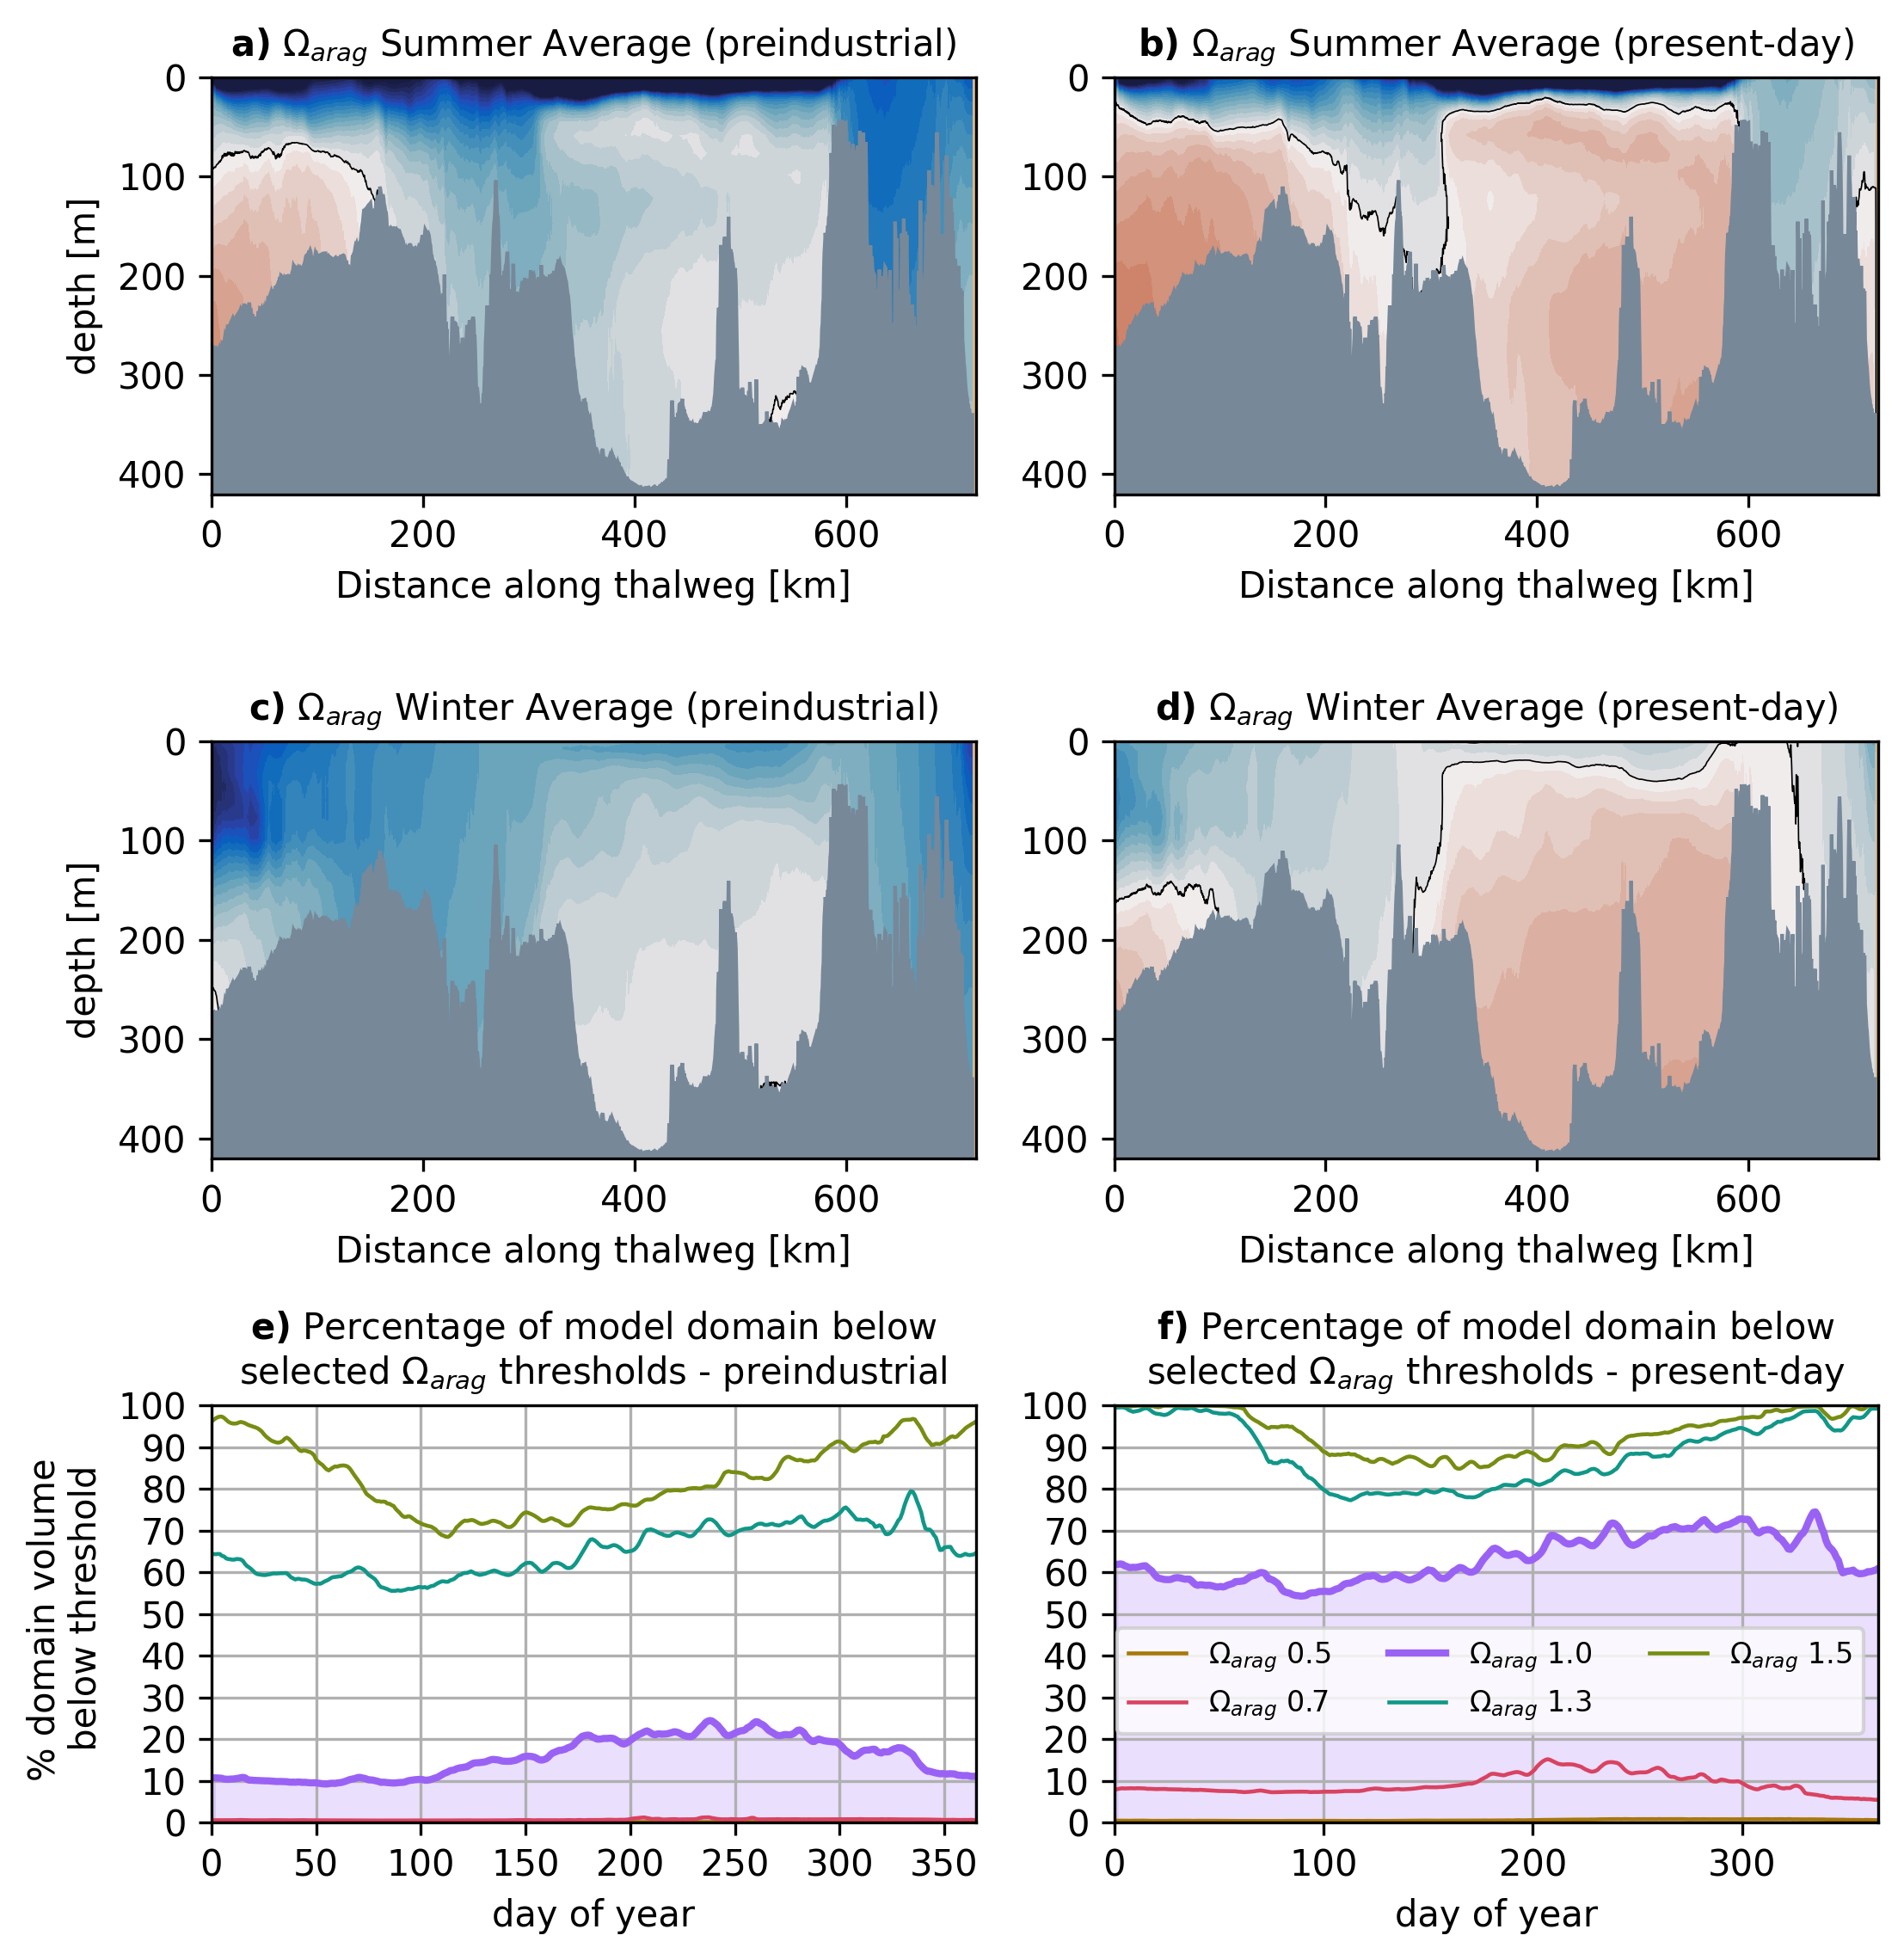

In [33]:
ts = 10
fs = 10

fig, axs = plt.subplots(3,2, figsize=(19/2.54,23*0.85/2.54), 
                        dpi = 300, facecolor='w', edgecolor='k')

axs = axs.ravel()

######
ax1 = axs[0]
PI9_summer_3mon[PI9_summer_3mon > 1e10] = 1.1
cbar = \
contour_thalweg_loc(ax1, PI9_summer_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax1.set_ylim([0,420])
ax1.invert_yaxis()
ax1.set_title(r'$\bf{a)}$ $\Omega_{arag}$ Summer Average (preindustrial)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_{arag}$', fontsize = fs)
ax1.tick_params(axis='both', which='major', labelsize=fs)
ax1.set_xlabel('Distance along thalweg [km]', fontsize = fs)
ax1.set_ylabel('depth [m]', fontsize = fs)
cbar.remove()

varP=PI9_summer_3mon[:,thalweg_points[:,0],thalweg_points[:,1]]
test = np.transpose(varP.T)

for i in range(0,1540):
    w = np.where(test[:,i] == 1.1)
    start_of_problem = (w[0][0])
    test[start_of_problem:40,i] = test[start_of_problem-1,i]
    
CS=ax1.contour(xx, gdept_thal,test,[1], colors='k', linewidths = 0.4, linestyle = ':', zorder = 1)
cbar.add_lines(CS)
        
thalweg_bottom = bathy2[thalweg_points[:, 0], thalweg_points[:, 1]]
# Construct bathy polygon again
zmin = 450
poly = np.zeros((thalweg_bottom.shape[0]+2, 2))
poly[0, :] = 0, zmin
poly[1:-1, 0] = xx[0, :]
poly[1:-1:, 1] = thalweg_bottom
poly[-1, :] = xx[0, -1], zmin
ax1.add_patch(patches.Polygon(poly, facecolor='burlywood', edgecolor='burlywood', zorder = 0))

#####################

ax2 = axs[2]
PI9_winter_3mon[PI9_winter_3mon > 1e10] = 1.1
cbar = \
contour_thalweg_loc(ax2, PI9_winter_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax2.set_title(r'$\bf{c)}$ $\Omega_{arag}$ Winter Average (preindustrial)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_{arag}$', fontsize = fs)
ax2.tick_params(axis='both', which='major', labelsize=fs)
ax2.set_xlabel('Distance along thalweg [km]', fontsize = fs)
cbar.remove()
ax2.set_ylim([0,420])
ax2.invert_yaxis()
ax2.set_ylabel('depth [m]', fontsize = fs)

varP=PI9_winter_3mon[:,thalweg_points[:,0],thalweg_points[:,1]]
test = np.transpose(varP.T)

for i in range(0,1540):
    w = np.where(test[:,i] == 1.1)
    start_of_problem = (w[0][0])
    test[start_of_problem:40,i] = test[start_of_problem-1,i]
    
CS=ax2.contour(xx, gdept_thal,test,[1], colors='k', linewidths = 0.4, linestyle = ':', zorder = 1)
cbar.add_lines(CS)
        
thalweg_bottom = bathy2[thalweg_points[:, 0], thalweg_points[:, 1]]
# Construct bathy polygon again
zmin = 450
poly = np.zeros((thalweg_bottom.shape[0]+2, 2))
poly[0, :] = 0, zmin
poly[1:-1, 0] = xx[0, :]
poly[1:-1:, 1] = thalweg_bottom
poly[-1, :] = xx[0, -1], zmin
ax2.add_patch(patches.Polygon(poly, facecolor='burlywood', edgecolor='burlywood', zorder = 0))

###################

ax3 = axs[1]
BR3_summer_3mon[BR3_summer_3mon > 1e10] = 1.1
cbar = \
contour_thalweg_loc(ax3, BR3_summer_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax3.set_title(r'$\bf{b)}$ $\Omega_{arag}$ Summer Average (present-day)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_{arag}$', fontsize = fs)
ax3.tick_params(axis='both', which='major', labelsize=fs)
ax3.set_xlabel('Distance along thalweg [km]', fontsize = fs)
cbar.remove()
ax3.set_ylim([0,420])
ax3.invert_yaxis()
ax3.set_ylabel('', fontsize = fs)


varP=BR3_summer_3mon[:,thalweg_points[:,0],thalweg_points[:,1]]
test = np.transpose(varP.T)

for i in range(0,1540):
    w = np.where(test[:,i] == 1.1)
    start_of_problem = (w[0][0])
    test[start_of_problem:40,i] = test[start_of_problem-1,i]
    
CS=ax3.contour(xx, gdept_thal,test,[1], colors='k', linewidths = 0.4, linestyle = ':', zorder = 1)
cbar.add_lines(CS)
        
thalweg_bottom = bathy2[thalweg_points[:, 0], thalweg_points[:, 1]]
# Construct bathy polygon again
zmin = 450
poly = np.zeros((thalweg_bottom.shape[0]+2, 2))
poly[0, :] = 0, zmin
poly[1:-1, 0] = xx[0, :]
poly[1:-1:, 1] = thalweg_bottom
poly[-1, :] = xx[0, -1], zmin
ax3.add_patch(patches.Polygon(poly, facecolor='burlywood', edgecolor='burlywood', zorder = 0))

#################

ax4 = axs[3]
BR3_winter_3mon[BR3_winter_3mon > 1e10] = 1.1
cbar = \
contour_thalweg_loc(ax4, BR3_winter_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax4.set_title(r'$\bf{d)}$ $\Omega_{arag}$ Winter Average (present-day)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_{arag}$', fontsize = fs)
ax4.tick_params(axis='both', which='major', labelsize=fs)
ax4.set_xlabel('Distance along thalweg [km]', fontsize = fs)
ax4.set_ylabel('', fontsize = fs)
cbar.remove()
ax4.set_ylim([0,420])
ax4.invert_yaxis()

varP=BR3_winter_3mon[:,thalweg_points[:,0],thalweg_points[:,1]]
test = np.transpose(varP.T)

for i in range(0,1540):
    w = np.where(test[:,i] == 1.1)
    start_of_problem = (w[0][0])
    test[start_of_problem:40,i] = test[start_of_problem-1,i]
    
CS=ax4.contour(xx, gdept_thal,test,[1], colors='k', linewidths = 0.4, linestyle = ':', zorder = 1)
cbar.add_lines(CS)
        
thalweg_bottom = bathy2[thalweg_points[:, 0], thalweg_points[:, 1]]
# Construct bathy polygon again
zmin = 450
poly = np.zeros((thalweg_bottom.shape[0]+2, 2))
poly[0, :] = 0, zmin
poly[1:-1, 0] = xx[0, :]
poly[1:-1:, 1] = thalweg_bottom
poly[-1, :] = xx[0, -1], zmin
ax4.add_patch(patches.Polygon(poly, facecolor='burlywood', edgecolor='burlywood', zorder = 0))



ax5 = axs[4]

ax5.plot(days,PI_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 0.5 \n (PI)')
ax5.plot(days,PI_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = '-')
ax5.plot(days,PI_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = 2, linestyle = '-')
ax5.plot(days,PI_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = '-')

ax5.plot(days,PI_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = '-')
ax5.fill_between(days, np.zeros_like(days), PI_under_1pt0_vol*100, \
                 color = tcm(1.*5/11), alpha = 0.2 )

ax5.tick_params(axis='both', which='major', labelsize=fs)

w = ax5.set_xticks(np.arange(0, 365, step=50))
ax5.set_xlim(0,365)
ax5.set_ylim(0,100)
w = ax5.set_yticks(np.arange(0, 110, step=10))
ax5.set_ylabel('% domain volume \n below threshold', fontsize = fs)
ax5.set_xlabel('day of year', fontsize = fs)
#ax5.set_title(r'$\bf{e)}$ Percentage of model domain below \r selected $\Omega_{arag}$ thresholds - preindustrial', fontsize = fs)
ax5.set_title(r"$\bf{e)}$ Percentage of model domain below"
           "\n"  # Newline: the backslash is interpreted as usual
           r"selected $\Omega_{arag}$ thresholds - preindustrial", fontsize = fs)
ax5.grid()

ax5 = axs[5]
ax5.plot(days,BR_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 0.5')
ax5.plot(days,BR_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 0.7')
ax5.plot(days,BR_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = 2, linestyle = '-', label = '$\Omega_{arag}$ 1.0')
ax5.plot(days,BR_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 1.3')

ax5.plot(days,BR_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 1.5')
ax5.fill_between(days, np.zeros_like(days), BR_under_1pt0_vol*100, \
                 color = tcm(1.*5/11), alpha = 0.2 )
#ax5.set_ylabel('% domain volume below threshold', fontsize = fs)

ax5.set_xlim(0,365)
ax5.set_ylim(0,100)
ax5.legend(ncol = 3, fontsize = 8, bbox_to_anchor=(0.5, 0., 0.5, 0.5))
w = ax5.set_yticks(np.arange(0, 110, step=10))
#ax5.set_ylabel('% domain volume below threshold', fontsize = fs)
ax5.set_xlabel('day of year', fontsize = fs)
ax5.set_title(r"$\bf{f)}$ Percentage of model domain below"
           "\n"  # Newline: the backslash is interpreted as usual
           r"selected $\Omega_{arag}$ thresholds - present-day", fontsize = fs)
ax5.grid()

plt.tight_layout()

fig.savefig('./CG_FIGS/FIG_CG_05_aragonite_undersaturation.jpg')




## legacy code

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)

fs = 11.5
fig, ax = plt.subplots(figsize=(10,4))
im = ax.imshow(np.random.rand(0,2), vmin = 0, vmax = 2, cmap = cmocean.cm.balance_r)
ax.set_xlabel("x label")

cbar = fig.colorbar(im, orientation="horizontal", pad=0.2)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_{arag}$', fontsize = fs)
plt.show()

In [ ]:
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy
tzero = 0
tdepths = 0
tlat = 50

tdic = 2450*1e-3
talk = tdic + (50*1e-3)#2200*1e-3
tsal = 32
ttemp = 15
response_tup = mocsy.mvars(temp=ttemp, sal=tsal, alk=talk, dic=tdic, 
                   sil=tzero, phos=tzero, patm=10, depth=tdepths, lat=tlat, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

print(OmegaA)